In [9]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

Upwind Scheme - CFL Number: 0.8000000000000002


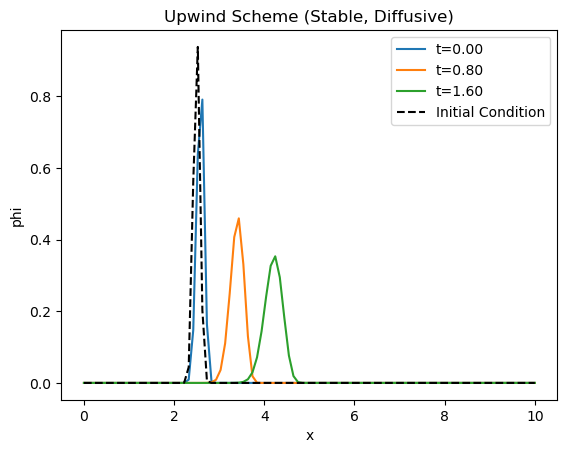

In [10]:
# Define parameters
Nx = 100          # Number of spatial points
L = 10.0         # Domain length
dx = L / Nx      # Spatial step
dt = 0.8 * dx    # Time step (CFL < 1 for stability)
u = 1.0          # Advection speed
T = 2.0          # Total simulation time
Nt = int(T / dt) # Number of time steps

# CFL number
CFL = u * dt / dx
print(f"Upwind Scheme - CFL Number: {CFL}")

# Spatial grid
x = np.linspace(0, L, Nx)

# Initial condition: Gaussian pulse
phi = np.exp(-((x - L/4) / 0.1) ** 2)

# Store initial condition for reference
phi_init = phi.copy()

# Upwind scheme (Stable)
phi_new = np.zeros_like(phi)

for n in range(Nt):
    # Apply Upwind update (first-order)
    phi_new[1:] = phi[1:] - CFL * (phi[1:] - phi[:-1])  # Forward in time, backward in space

    # Update the field
    phi[:] = phi_new[:]

    # Plot every few steps
    if n % 10 == 0:
        plt.plot(x, phi, label=f"t={n*dt:.2f}")

# Plot results
plt.plot(x, phi_init, 'k--', label="Initial Condition")
plt.legend()
plt.xlabel("x")
plt.ylabel("phi")
plt.title("Upwind Scheme (Stable, Diffusive)")
plt.show()


Lax-Wendroff Scheme - CFL Number: 0.8000000000000002


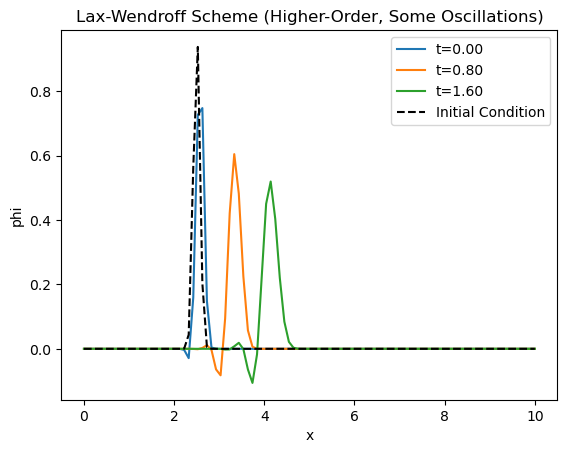

In [11]:
# Lax-Wendroff Scheme (Higher-Order, Less Diffusion)

# Reset phi to initial condition
phi = phi_init.copy()
phi_new = np.zeros_like(phi)

print(f"Lax-Wendroff Scheme - CFL Number: {CFL}")

for n in range(Nt):
    # Apply Lax-Wendroff update (Second-order)
    phi_new[1:-1] = (phi[1:-1] - 0.5 * CFL * (phi[2:] - phi[:-2]) +
                     0.5 * CFL**2 * (phi[2:] - 2 * phi[1:-1] + phi[:-2]))

    # Update the field
    phi[:] = phi_new[:]

    # Plot every few steps
    if n % 10 == 0:
        plt.plot(x, phi, label=f"t={n*dt:.2f}")

# Plot results
plt.plot(x, phi_init, 'k--', label="Initial Condition")
plt.legend()
plt.xlabel("x")
plt.ylabel("phi")
plt.title("Lax-Wendroff Scheme (Higher-Order, Some Oscillations)")
plt.show()

CFL Number: 0.8000000000000002 (FTCS is always unstable for pure advection)


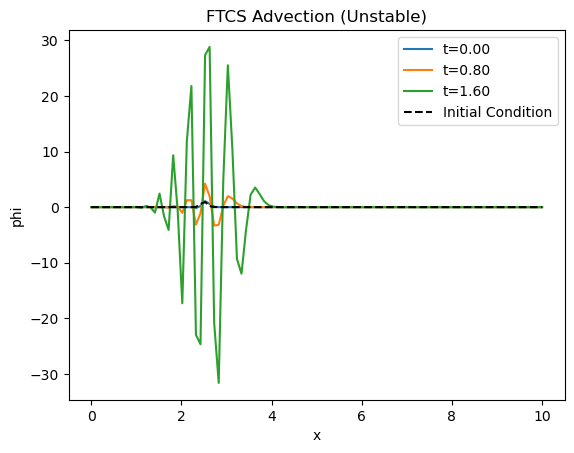

In [12]:
# Define parameters
Nx = 100          # Number of spatial points
L = 10.0         # Domain length
dx = L / Nx      # Spatial step
dt = 0.8 * dx    # Time step (deliberately chosen large)
u = 1.0          # Advection speed
T = 2.0          # Total simulation time
Nt = int(T / dt) # Number of time steps

# CFL number
CFL = u * dt / dx
print(f"CFL Number: {CFL} (FTCS is always unstable for pure advection)")

# Spatial grid
x = np.linspace(0, L, Nx)

# Initial condition: Gaussian pulse
phi = np.exp(-((x - L/4) / 0.1) ** 2)

# Store initial condition for reference
phi_init = phi.copy()

# FTCS scheme (Unstable!)
phi_new = np.zeros_like(phi)

for n in range(Nt):
    # Apply FTCS update
    phi_new[1:-1] = phi[1:-1] - (CFL / 2) * (phi[2:] - phi[:-2])
    
    # Update the field
    phi[:] = phi_new[:]

    # Plot every few steps
    if n % 10 == 0:
        plt.plot(x, phi, label=f"t={n*dt:.2f}")

# Plot results
plt.plot(x, phi_init, 'k--', label="Initial Condition")
plt.legend()
plt.xlabel("x")
plt.ylabel("phi")
plt.title("FTCS Advection (Unstable)")
plt.show()